# Skyrmion in a disk

In [1]:
import oommfc as oc
import discretisedfield as df

In [6]:
mesh = oc.Mesh(p1=(-50e-9, -50e-9, 0), p2=(50e-9, 50e-9, 10e-9), cell=(5e-9, 5e-9, 5e-9))

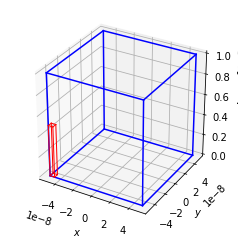

In [7]:
%matplotlib inline
mesh

In [8]:
system = oc.System(name="skyrmion")

system.hamiltonian = oc.Exchange(A=1.6e-11) + oc.DMI(D=4e-3) + \
                     oc.UniaxialAnisotropy(K=0.51e6, u=(0, 0, 1)) + oc.Demag()

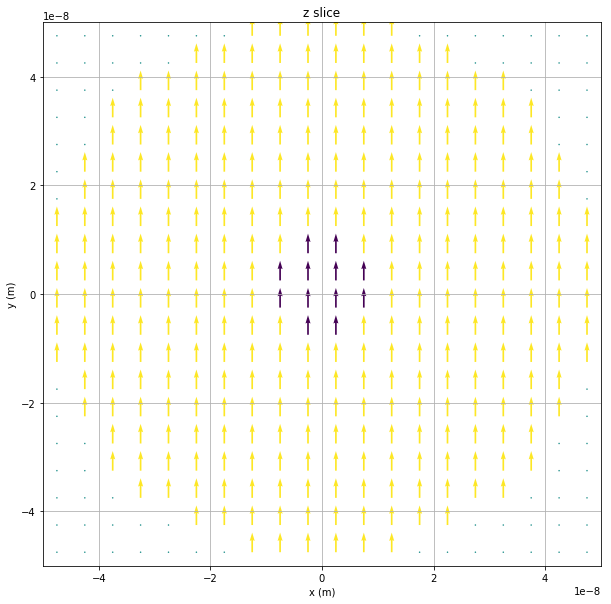

In [10]:
Ms = 1.1e6

def Ms_fun(pos):
    x, y, z = pos
    if (x**2 + y**2)**0.5 < 50e-9:
        return Ms
    else:
        return 0

def m_init(pos):
    x, y, z = pos
    if (x**2 + y**2)**0.5 < 10e-9:
        return (0, 0.1, -1)
    else:
        return (0, 0.1, 1)

system.m = df.Field(mesh, value=m_init, norm=Ms_fun)

system.m.plot_slice('z', 0, xsize=10);

2017/2/14 14:38: Calling OOMMF (skyrmion/skyrmion.mif) ... [0.7s]


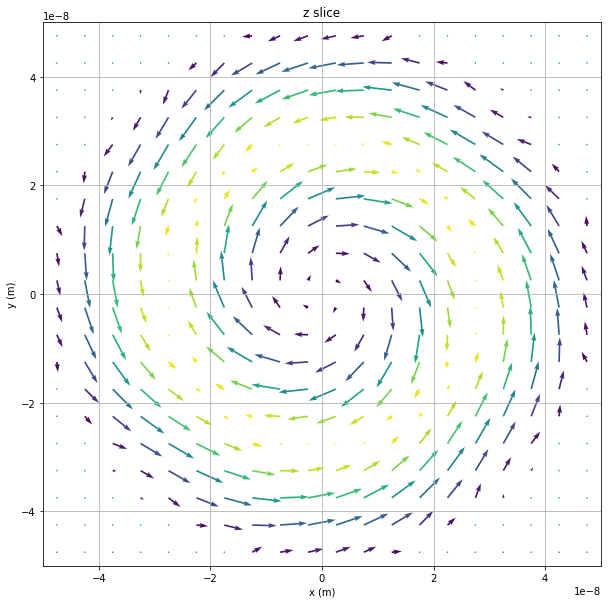

In [11]:
md = oc.MinDriver()
md.drive(system)

system.m.plot_slice('z', 0, xsize=10);